# Assignment 3
<strong> Group Members: </strong> Domitille Chambon, Sam D'Avila, Steven Hobson, Saiansh Raizada, Johann Thomas, & Purva Tiwari

## Packages

In [615]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
import math
import re
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import ReferenceArchitecture as ra
import spacy
import en_core_web_lg
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/domitillechambon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/domitillechambon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Task B

In [616]:
# Read in scraped data and remove unnecessary index column
raw = pd.read_csv("Beer Reviews.csv")
raw = raw.drop(['Unnamed: 0'], axis= 1)

In [617]:
# Function that removes punctuation
def punctuation_extermination(s):
    o = str.maketrans('', '', string.punctuation)
    return str(s).translate(o)

# Remove punctuation from reviews
raw['Review'] = raw['Review'].apply(punctuation_extermination)

In [618]:
# Creating a corpus with all the words from every review
raw_corpus = ""
for l in raw['Review']:
    l = str(l).lower()
    raw_corpus += l

raw_corpus[:500]

'nonei didnt think i was going to give it a perfect score but its looks smells tastes a 5 however the mouth feel is not by any means equal to look smell and taste pardon me i have to sit down mouth feel is well 11 yeh like twice as good as anything ive ever had before it grabs you by the face with both hands and says what was that that just went down my throat it tasted familiar like real pure butter on real belgiumchocolate buttermilk pancakes with fresh highbush blueberries real vermont maple s'

In [619]:
# Splitting corpus into individual words and removing stop words
raw_corpus = raw_corpus.split()
corpus_without_stop = [word for word in raw_corpus if word not in stopwords.words("english")]
corpus_without_stop[:500]

['nonei',
 'didnt',
 'think',
 'going',
 'give',
 'perfect',
 'score',
 'looks',
 'smells',
 'tastes',
 '5',
 'however',
 'mouth',
 'feel',
 'means',
 'equal',
 'look',
 'smell',
 'taste',
 'pardon',
 'sit',
 'mouth',
 'feel',
 'well',
 '11',
 'yeh',
 'like',
 'twice',
 'good',
 'anything',
 'ive',
 'ever',
 'grabs',
 'face',
 'hands',
 'says',
 'went',
 'throat',
 'tasted',
 'familiar',
 'like',
 'real',
 'pure',
 'butter',
 'real',
 'belgiumchocolate',
 'buttermilk',
 'pancakes',
 'fresh',
 'highbush',
 'blueberries',
 'real',
 'vermont',
 'maple',
 'syrup',
 'madagascar',
 'vanilla',
 'served',
 'seattle',
 'coffee',
 'shot',
 'pappyso',
 'read',
 'review',
 'called',
 'legendary',
 'kbbs',
 '“typical…white',
 'trash”',
 'kinda',
 'made',
 'nervous',
 'don’t',
 'dig',
 'whitepale',
 'stouts',
 'thought',
 '“how',
 'could',
 'miss',
 'white',
 'stout”',
 'well',
 'happily',
 'guy',
 'drinking',
 'something',
 'else',
 'maybe',
 'meant',
 'kbbs',
 'like',
 'mountain',
 'dew',
 'enjoye

In [620]:
# Freq count of every word in corpus_without_stop
freq = FreqDist(corpus_without_stop)
last_rank = 50

# Separating words and their counts into lists for plot
words = [element[0] for element in freq.most_common(last_rank)] # words (x axis)
counts = [element[1] for element in freq.most_common(last_rank)] # freqs (y axis)

<AxesSubplot:xlabel='Word', ylabel='Count'>

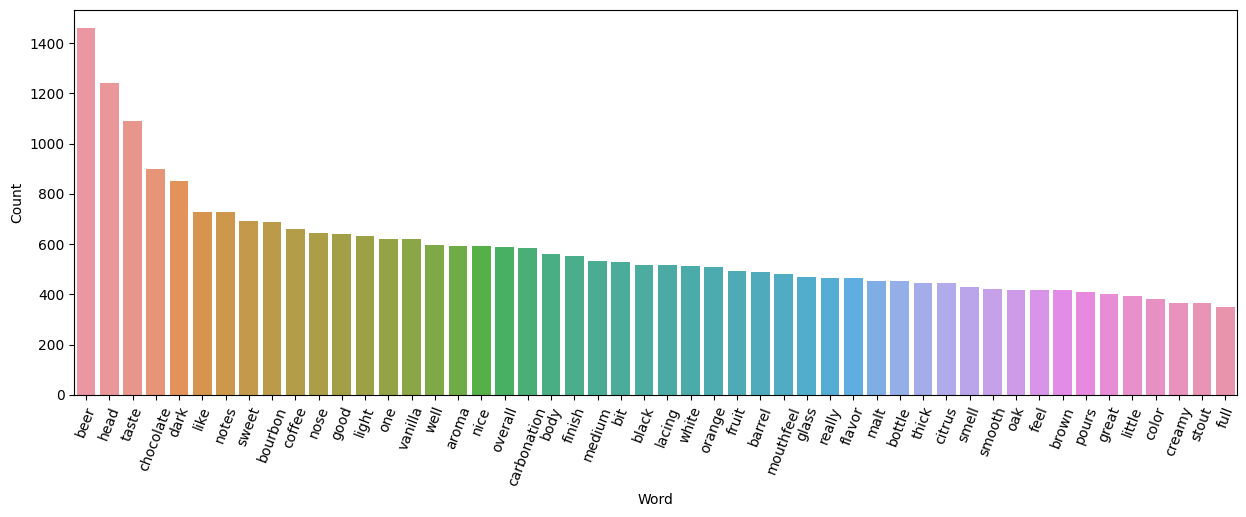

In [621]:
# Word Frequency Chart
def plot_word_frequency(words,top_n=10):
    """Function to plot the word frequencies"""
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    tempDict = {"Labels": labels, "Count": counts}
    plt.figure(figsize=(15,5))
    plt.ylabel("Count")
    plt.xlabel("Word")
    plt.xticks(rotation=69)
    plot = sns.barplot(data=tempDict, x= "Labels", y= "Count")
    return plot
    
# Plot the Word Frequency Chart
plot_word_frequency(corpus_without_stop, 50)

### Customer specified attributes

<strong>Attributes selected:</strong> Chocolate, Dark, Sweet, Bourbon, Coffee

## Task C

In [622]:
WORD = re.compile(r"\w+")   # regex for extracting individual words

def get_cosine(vec1, vec2):
    """Calculate cosine similarity"""
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

def text_to_vector(text):
    """Convert text to vector"""
    words = WORD.findall(text)
    return Counter(words)

In [623]:
attr = 'chocolate dark sweet bourbon coffee'
attr_vector = text_to_vector(attr)

# make df for cosine similarity scores
df_similarity = pd.DataFrame(data=[raw['Beer_Name'], raw['Review']]).T
df_similarity.columns = ['product_name', 'product_review']
df_similarity = df_similarity.drop(0)
df_similarity['similarity_score'] = df_similarity['product_review']
df_similarity['similarity_score'] = df_similarity['similarity_score'].apply(lambda r: get_cosine(attr_vector, text_to_vector(r)))

In [624]:
# See results from new dataframe with similarity score
df_similarity.head()

,product_name,product_review,similarity_score
1,Kentucky Brunch Brand Stout,I didnt think i was going to give it a perfect...,0.035921
2,Kentucky Brunch Brand Stout,So I just read a review that called the legend...,0.019702
3,Kentucky Brunch Brand Stout,2021 vintage bottle 79\n\nHoly Fucking Shit KB...,0.110674
4,Kentucky Brunch Brand Stout,Celebrating my buddy Rug with his 1000th beer ...,0.071157
5,Kentucky Brunch Brand Stout,Thick and syrupy pour mocha head Aroma is booz...,0.063246


In [625]:
# average similarity score for each brand
df_brandwise = df_similarity[df_similarity['similarity_score'] != 0].groupby(by='product_name').mean()
df_brandwise.head()

,similarity_score
product_name,
A Deal With The Devil - Double Oak-Aged,0.095450
A Deal With The Devil - Triple Oak-Aged,0.138721
Abner,0.023313
Abrasive Ale,0.015972
Abraxas,0.095875


In [626]:
# Create csv from dataframe with product, review, and similarity score
df_similarity.to_csv('similarity_scores.csv')

## Task D

In [627]:
# Read in similarity score csv and remove unnecessary index column
df_scores = pd.read_csv("similarity_scores.csv")
df_scores = df_scores.drop(['Unnamed: 0'], axis= 1)

In [628]:
def windowmaker(attr, sent):
    """Make window around attribute in text"""
    if attr not in sent:
        return None
    attr_idx = sent.index(attr)
    i, j = attr_idx - 2, attr_idx + 2
    if i < 0:
        i = 0
    if j > len(sent):
        j = len(sent)
    return sent[i:j]

In [629]:
# List of stop words
stop = stopwords.words('english')

def remove_stopwords(sent):
    """Remove stopwords"""
    new = []
    for w in sent:
        if w not in stop:
            new.append(w)
    return new

In [630]:
# initialize vader sent analysis
analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_score(sentence):
    """Vader sentiment analysis scoring"""
    if not sentence:
        return None
    sentence = ' '.join(sentence)
    score = analyser.polarity_scores(sentence)
    return score['compound']

In [631]:
attrs = ['chocolate', 'dark', 'sweet', 'bourbon', 'coffee']

# filtering out nonzero cosine similarity scores
df_scores_filt = df_scores[df_scores['similarity_score'] != 0].copy()

# Calculating sentiment analysis of each attribute for all rows in the dataframe
for attr in attrs:
    col_name = f'{attr}_score'
    df_scores_filt[col_name] = df_scores_filt['product_review'].apply(str.lower)
    df_scores_filt[col_name] = df_scores_filt[col_name].apply(lambda r: re.sub(r'[^A-Za-z0-9 ]+', '', r))
    df_scores_filt[col_name] = df_scores_filt[col_name].apply(str.split)
    df_scores_filt[col_name] = df_scores_filt[col_name].apply(remove_stopwords)
    df_scores_filt[col_name] = df_scores_filt[col_name].apply(lambda r: windowmaker(attr, r))
    df_scores_filt[col_name] = df_scores_filt[col_name].apply(lambda r: sentiment_analyzer_score(r))

In [632]:
df_scores_filt.head()

,product_name,product_review,similarity_score,chocolate_score,dark_score,sweet_score,bourbon_score,coffee_score
0,Kentucky Brunch Brand Stout,I didnt think i was going to give it a perfect...,0.035921,NaN,NaN,NaN,NaN,0.0000
1,Kentucky Brunch Brand Stout,So I just read a review that called the legend...,0.019702,NaN,0.6222,NaN,NaN,0.1779
2,Kentucky Brunch Brand Stout,2021 vintage bottle 79\n\nHoly Fucking Shit KB...,0.110674,0.0,NaN,NaN,0.0,0.0000
3,Kentucky Brunch Brand Stout,Celebrating my buddy Rug with his 1000th beer ...,0.071157,0.0,NaN,NaN,NaN,NaN
4,Kentucky Brunch Brand Stout,Thick and syrupy pour mocha head Aroma is booz...,0.063246,NaN,NaN,NaN,NaN,NaN


In [633]:
df_scores_filt.describe()

,similarity_score,chocolate_score,dark_score,sweet_score,bourbon_score,coffee_score
count,989.000000,496.000000,471.000000,468.000000,368.000000,347.000000
mean,0.114104,0.094939,0.077446,0.473938,0.112040,0.080115
std,0.079937,0.215531,0.195770,0.210252,0.221719,0.209191
min,0.007223,-0.557400,-0.493900,-0.471700,-0.476700,-0.526700
25%,0.052154,0.000000,0.000000,0.458800,0.000000,0.000000
50%,0.093026,0.000000,0.000000,0.458800,0.000000,0.000000
75%,0.156293,0.000000,0.000000,0.509500,0.177900,0.000000
max,0.454077,0.807400,0.807400,0.859100,0.875000,0.784500


In [634]:
# avg similarity score per brand
df_brandwise = df_scores_filt[df_scores_filt['similarity_score'] != 0].groupby(by='product_name').mean()

In [635]:
def avg(row):
    """Calculate average of attribute scores"""
    scores = [row['chocolate_score'], row['dark_score'], row['sweet_score'], row['bourbon_score'], row['coffee_score']]
    n = 0 # war crime
    avg = 0
    for s in scores:
        if np.isnan(s) or s==0:
            continue
        n += 1
        avg += s
    if n == 0:
        n += 1
    return avg / n

df_brandwise['avg_score'] = df_brandwise.apply(lambda b: avg(b), axis=1)

In [636]:
df_brandwise.head()

,similarity_score,chocolate_score,dark_score,sweet_score,bourbon_score,coffee_score,avg_score
product_name,,,,,,,
A Deal With The Devil - Double Oak-Aged,0.095450,NaN,0.000000,0.48415,0.075433,0.0000,0.279792
A Deal With The Devil - Triple Oak-Aged,0.138721,NaN,0.000000,0.45880,0.000000,NaN,0.458800
Abner,0.023313,NaN,NaN,0.45880,NaN,NaN,0.458800
Abrasive Ale,0.015972,NaN,NaN,0.45880,NaN,NaN,0.458800
Abraxas,0.095875,0.079629,0.069675,0.53690,0.273200,0.0602,0.203921


## Task E

In [637]:
# Create evaluation score by averaging similarity score and sentiment score
df_brandwise['evaluation_metric'] = (df_brandwise['similarity_score'] + df_brandwise['avg_score'])/2 

# Sort in descending order so highest score is at top
df_brandwise = df_brandwise.sort_values(by='evaluation_metric', ascending=False)

# Display
df_brandwise.head()

,similarity_score,chocolate_score,dark_score,sweet_score,bourbon_score,coffee_score,avg_score,evaluation_metric
product_name,,,,,,,,
Black Tuesday - Rum Barrel-Aged,0.096538,0.0,0.0,0.796400,NaN,NaN,0.796400,0.446469
Crusher,0.051988,NaN,NaN,0.765000,NaN,NaN,0.765000,0.408494
JJJuiceee Machine,0.056567,NaN,0.0,0.735100,NaN,NaN,0.735100,0.395834
Doubleganger,0.054225,NaN,0.0,0.662933,NaN,NaN,0.662933,0.358579
I Will Not Be Afraid,0.173847,0.0,0.0,0.542667,NaN,0.0,0.542667,0.358257


In [638]:
# Top 3 recommended products based on evaluation score
df_brandwise['evaluation_metric'].head(n=3)

product_name
Black Tuesday - Rum Barrel-Aged    0.446469
Crusher                            0.408494
JJJuiceee Machine                  0.395834
Name: evaluation_metric, dtype: float64

The three products we would recommend for this user based on their top 5 selected attributes are Black Tuesday - Rum Barrel-Aged, Crusher, and JJJuiceee Machine, which are have the highest evaluation scores.
</br>
</br>
<table>
    <tr>
        <th> Beer </th>
        <th> Rating</th>
        <th> Similarity Score </th>
        <th> Sentiment Score </th>
        <th> Evaluation Score </th>
    </tr>
    <tr>
        <td> Black Tuesday - Rum Barrel-Aged </td>
        <td>  4.224 </td>
        <td>  .0965 </td>
        <td>  .7964 </td>
        <td>  .4465 </td>
    </tr>
    <tr>
        <td> Crusher </td>
        <td>  4.4511 </td>
        <td>  .0520 </td>
        <td>  .7650 </td>
        <td>  .4085 </td>
    </tr>
    <tr>
        <td> JJJuiceee Machine </td>
        <td>  4.256 </td>
        <td>  .0566 </td>
        <td>  .7351 </td>
        <td>  .3958 </td>
    </tr>
</table>

## Task F

In [639]:
# Read in similarity csv and dorp unnecessary index colum
df_scores = pd.read_csv("similarity_scores.csv")
df_scores = df_scores.drop(['Unnamed: 0'], axis= 1)

In [640]:
# calculate spacy similarity
nlp = en_core_web_lg.load()
scores = df_scores.copy()
scores.drop('similarity_score', axis=1, inplace=True)
doc1 = nlp(attr)
scores['spacy_score'] = scores['product_review'].apply(lambda doc2: doc1.similarity(nlp(doc2)))

/var/folders/s5/8fq8vkds1wschn5rrzxkc8br0000gn/T/ipykernel_28959/3964935266.py:6: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  scores['spacy_score'] = scores['product_review'].apply(lambda doc2: doc1.similarity(nlp(doc2)))


In [641]:
# avg spacy similarity scores for each brand
spacygroups = scores[scores['spacy_score'] != 0].groupby(by='product_name').mean()

In [642]:
def no_attrs(s):
    """Check for attributes"""
    attrs = ['chocolate', "dark" , "sweet" , "bourbon" ,"coffee"]
    s = s.lower()
    s = re.sub(r'[^A-Za-z0-9 ]+', '', s)
    s = s.split()
    for attr in attrs:
        if attr in s:
            return True
    return False
  
def remove_stop(sent):
    """Remove stopwords"""
    new = []
    for w in sent:
        if w not in stop:
            new.append(w)
    return new

In [643]:
attrs = ['chocolate', "dark" , "sweet" , "bourbon" ,"coffee"]
spacy_filter = scores.copy()
mask = spacy_filter['product_review'].apply(no_attrs)
df_scores_spacy_filt = spacy_filter[mask]

# Calculating similarity score of each attribute for each row of dataframe
for attr in attrs:
    col_name = f'{attr}_score'
    spacy_filter[col_name] = spacy_filter['product_review'].apply(str.lower)
    spacy_filter[col_name] = spacy_filter[col_name].apply(lambda r: re.sub(r'[^A-Za-z0-9 ]+', '', r))
    spacy_filter[col_name] = spacy_filter[col_name].apply(str.split)
    spacy_filter[col_name] = spacy_filter[col_name].apply(remove_stop)
    spacy_filter[col_name] = spacy_filter[col_name].apply(lambda r: windowmaker(attr, r))
    spacy_filter[col_name] = spacy_filter[col_name].apply(lambda r: sentiment_analyzer_score(r))

spacy_filter.describe() # df with spacy scores and sentiment scores

,spacy_score,chocolate_score,dark_score,sweet_score,bourbon_score,coffee_score
count,2513.000000,504.000000,486.000000,491.000000,377.000000,351.000000
mean,0.482850,0.093330,0.078167,0.473247,0.113060,0.080702
std,0.113468,0.214197,0.195100,0.206961,0.221079,0.209488
min,-0.159943,-0.557400,-0.493900,-0.471700,-0.476700,-0.526700
25%,0.465705,0.000000,0.000000,0.458800,0.000000,0.000000
50%,0.514984,0.000000,0.000000,0.458800,0.000000,0.000000
75%,0.548490,0.000000,0.000000,0.458800,0.177900,0.000000
max,0.807535,0.807400,0.807400,0.875000,0.875000,0.784500


In [644]:
spacy_filter.head() # df with spacy scores and sentiment scores

,product_name,product_review,spacy_score,chocolate_score,dark_score,sweet_score,bourbon_score,coffee_score
0,Kentucky Brunch Brand Stout,I didnt think i was going to give it a perfect...,0.504478,NaN,NaN,NaN,NaN,0.0000
1,Kentucky Brunch Brand Stout,So I just read a review that called the legend...,0.489187,NaN,0.6222,NaN,NaN,0.1779
2,Kentucky Brunch Brand Stout,2021 vintage bottle 79\n\nHoly Fucking Shit KB...,0.563099,0.0,NaN,NaN,0.0,0.0000
3,Kentucky Brunch Brand Stout,Celebrating my buddy Rug with his 1000th beer ...,0.566004,0.0,NaN,NaN,NaN,NaN
4,Kentucky Brunch Brand Stout,Thick and syrupy pour mocha head Aroma is booz...,0.565001,NaN,NaN,NaN,NaN,NaN


In [645]:
# avg spacy scores per brand
spacy_average = spacy_filter[spacy_filter['spacy_score'] != 0].groupby(by='product_name').mean()
spacy_average.head()

,spacy_score,chocolate_score,dark_score,sweet_score,bourbon_score,coffee_score
product_name,,,,,,
4th Anniversary,0.392625,NaN,NaN,NaN,NaN,NaN
A Deal With The Devil - Double Oak-Aged,0.474971,NaN,0.0,0.48415,0.075433,0.0
A Deal With The Devil - Triple Oak-Aged,0.399525,NaN,0.0,0.45880,0.000000,NaN
Abner,0.471333,NaN,NaN,0.45880,NaN,NaN
Abrasive Ale,0.483451,NaN,NaN,0.45880,NaN,NaN


In [646]:
# Fill nan with 0
spacy_average = spacy_average.fillna(0)

In [647]:
# avg of attribute sentiment scores
spacy_average['avg_sent'] = spacy_average.apply(lambda r: avg(r), axis=1)
spacy_average.head()

,spacy_score,chocolate_score,dark_score,sweet_score,bourbon_score,coffee_score,avg_sent
product_name,,,,,,,
4th Anniversary,0.392625,0.0,0.0,0.00000,0.000000,0.0,0.000000
A Deal With The Devil - Double Oak-Aged,0.474971,0.0,0.0,0.48415,0.075433,0.0,0.279792
A Deal With The Devil - Triple Oak-Aged,0.399525,0.0,0.0,0.45880,0.000000,0.0,0.458800
Abner,0.471333,0.0,0.0,0.45880,0.000000,0.0,0.458800
Abrasive Ale,0.483451,0.0,0.0,0.45880,0.000000,0.0,0.458800


In [648]:
# Create evaluation score by averaging similarity score and sentiment score
spacy_average['evaluation_metric'] = (spacy_average['spacy_score'] + spacy_average['avg_sent'])/2 

# Sort in descending order so highest score is at top
spacy_average = spacy_average.sort_values(by='evaluation_metric', ascending=False)

# Display
spacy_average.head()

,spacy_score,chocolate_score,dark_score,sweet_score,bourbon_score,coffee_score,avg_sent,evaluation_metric
product_name,,,,,,,,
Crusher,0.466873,0.0,0.0,0.765000,0.0,0.0,0.765000,0.615936
JJJuiceee Machine,0.456079,0.0,0.0,0.735100,0.0,0.0,0.735100,0.595589
Black Tuesday - Rum Barrel-Aged,0.372396,0.0,0.0,0.796400,0.0,0.0,0.796400,0.584398
Doubleganger,0.494777,0.0,0.0,0.662933,0.0,0.0,0.662933,0.578855
Double Dry Hopped Mylar Bags,0.489649,0.0,0.0,0.634500,0.0,0.0,0.634500,0.562075


In [649]:
# Top 3 recommended products based on evaluation score
spacy_average['evaluation_metric'].head(n=3)

product_name
Crusher                            0.615936
JJJuiceee Machine                  0.595589
Black Tuesday - Rum Barrel-Aged    0.584398
Name: evaluation_metric, dtype: float64

The three products we would recommend for this user based on their top 5 selected attributes are Crusher, JJJuiceee Machine, and Black Tuesday - Rum Barrel-Aged which are have the highest evaluation scores. These recommended products are identical to those using a cosine similarity and sentiment score evaluation score; however, the order in which they're recommended is slightly different.
</br>
</br>
<table>
    <tr>
        <th> Beer </th>
        <th> Rating</th>
        <th> Similarity Score </th>
        <th> Sentiment Score </th>
        <th> Evaluation Score </th>
    </tr>
    <tr>
        <td> Crusher </td>
        <td>  4.4511 </td>
        <td>  .4669 </td>
        <td>  .7650 </td>
        <td>  .6159 </td>
    </tr>
    <tr>
        <td> JJJuiceee Machine </td>
        <td>  4.256 </td>
        <td>  .4561 </td>
        <td>  .7351 </td>
        <td>  .5956 </td>
    </tr>
    <tr>
        <td> Black Tuesday - Rum Barrel-Aged </td>
        <td>  4.224 </td>
        <td>  .3734 </td>
        <td>  .7964 </td>
        <td>  .5844 </td>
    </tr>
</table>

### How Spacy and Cosine Similarity Differ

Cosine Similarity

In [650]:
attrDark = 'dark'
attrBourbon = 'bourbon'
attr_vector_dark = text_to_vector(attrDark)
attr_vector_bourbon = text_to_vector(attrBourbon)

# make df for cosine similarity scores dark
dfCosDark = pd.DataFrame(data=[raw['Beer_Name'], raw['Review']]).T
dfCosDark.columns = ['product_name', 'product_review']
dfCosDark['similarity_score_dark'] = dfCosDark['product_review']
dfCosDark['similarity_score_dark'] = dfCosDark['similarity_score_dark'].apply(lambda r: get_cosine(attr_vector_dark, text_to_vector(r)))
dfCosDark = dfCosDark.drop(columns= 'product_review')

# make df for cosine similarity scores bourbon
dfCosBourbon = pd.DataFrame(data=[raw['Beer_Name'], raw['Review']]).T
dfCosBourbon.columns = ['product_name', 'product_review']
dfCosBourbon['similarity_score_bourbon'] = dfCosBourbon['product_review']
dfCosBourbon['similarity_score_bourbon'] = dfCosBourbon['similarity_score_bourbon'].apply(lambda r: get_cosine(attr_vector_bourbon, text_to_vector(r)))
dfCosBourbon = dfCosBourbon.drop(columns= 'product_review')

In [651]:
# Finding percentage of times dark is mentioned in review with product using cosine
dfDark = dfCosDark.copy()
dfDark = dfDark[dfDark['similarity_score_dark'] != 0].groupby(by='product_name').mean()
dfDark['CountDark'] = dfCosDark[dfCosDark['similarity_score_dark'] != 0].groupby(by='product_name').count()
dfDark['CountProduct'] = dfCosDark.groupby(by='product_name').count()
dfDark['PercentageDark'] = (dfDark['CountDark'] / dfDark['CountProduct']) * 100
dfDark = dfDark.drop(columns= ['similarity_score_dark', 'CountDark', 'CountProduct'])

# Finding percentage of times bourbon is mentioned in review with product using cosine
dfBourbon = dfCosBourbon.copy()
dfBourbon = dfBourbon[dfBourbon['similarity_score_bourbon'] != 0].groupby(by='product_name').mean()
dfBourbon['CountBourbon'] = dfCosBourbon[dfCosBourbon['similarity_score_bourbon'] != 0].groupby(by='product_name').count()
dfBourbon['CountProduct'] = dfCosBourbon.groupby(by='product_name').count()
dfBourbon['PercentageBourbon'] = (dfBourbon['CountBourbon'] / dfBourbon['CountProduct']) * 100
dfBourbon = dfBourbon.drop(columns= ['similarity_score_bourbon', 'CountBourbon', 'CountProduct'])

spaCy

In [652]:
# make df for spacy scores dark
dfSpacyDark = df_scores.copy()
dfSpacyDark.drop('similarity_score', axis=1, inplace=True)
doc1 = nlp(attr)
dfSpacyDark['spacy_score_dark'] = dfSpacyDark['product_review'].apply(lambda doc2: doc1.similarity(nlp(doc2)))
dfSpacyDark = dfSpacyDark.drop(columns= 'product_review')

# make df for spacy scores dark
dfSpacyBourbon = df_scores.copy()
dfSpacyBourbon.drop('similarity_score', axis=1, inplace=True)
doc1 = nlp(attr)
dfSpacyBourbon['spacy_score_bourbon'] = dfSpacyBourbon['product_review'].apply(lambda doc2: doc1.similarity(nlp(doc2)))
dfSpacyBourbon = dfSpacyBourbon.drop(columns= 'product_review')

/var/folders/s5/8fq8vkds1wschn5rrzxkc8br0000gn/T/ipykernel_28959/500201754.py:5: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  dfSpacyDark['spacy_score_dark'] = dfSpacyDark['product_review'].apply(lambda doc2: doc1.similarity(nlp(doc2)))
/var/folders/s5/8fq8vkds1wschn5rrzxkc8br0000gn/T/ipykernel_28959/500201754.py:12: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  dfSpacyBourbon['spacy_score_bourbon'] = dfSpacyBourbon['product_review'].apply(lambda doc2: doc1.similarity(nlp(doc2)))


In [653]:
# Finding percentage of times dark is mentioned in review with product using spacy
dfDarkSpacy = dfSpacyDark.copy()
dfDarkSpacy = dfDarkSpacy[dfDarkSpacy['spacy_score_dark'] != 0].groupby(by='product_name').mean()
dfDarkSpacy['CountDark'] = dfSpacyDark[dfSpacyDark['spacy_score_dark'] != 0].groupby(by='product_name').count()
dfDarkSpacy['CountProduct'] = dfSpacyDark.groupby(by='product_name').count()
dfDarkSpacy['PercentageDark'] = (dfDarkSpacy['CountDark'] / dfDarkSpacy['CountProduct']) * 100
dfDarkSpacy = dfDarkSpacy.drop(columns= ['spacy_score_dark', 'CountDark', 'CountProduct'])

# Finding percentage of times bourbon is mentioned in review with product using spacy
dfBourbonSpacy = dfSpacyBourbon.copy()
dfBourbonSpacy = dfBourbonSpacy[dfBourbonSpacy['spacy_score_bourbon'] != 0].groupby(by='product_name').mean()
dfBourbonSpacy['CountBourbon'] = dfSpacyBourbon[dfSpacyBourbon['spacy_score_bourbon'] != 0].groupby(by='product_name').count()
dfBourbonSpacy['CountProduct'] = dfSpacyBourbon.groupby(by='product_name').count()
dfBourbonSpacy['PercentageBourbon'] = (dfBourbonSpacy['CountBourbon'] / dfBourbonSpacy['CountProduct']) * 100
dfBourbonSpacy = dfBourbonSpacy.drop(columns= ['spacy_score_bourbon', 'CountBourbon', 'CountProduct'])

In [654]:
print('Cosine Similarity Percentage Dark is Mentioned: ', dfDark.head(), "\n")
print('Spacy Percentage Dark is Mentioned: ', dfDarkSpacy.head(), "\n")
print('Cosine Similarity Percentage Bourbon is Mentioned: ', dfBourbon.head(), "\n")
print('Spacy Similarity Percentage Bourbon is Mentioned: ', dfBourbonSpacy.head(), "\n")

Cosine Similarity Percentage Dark is Mentioned:                                           PercentageDark
product_name                                           
A Deal With The Devil - Double Oak-Aged       10.000000
A Deal With The Devil - Triple Oak-Aged       25.000000
Abraxas                                       47.058824
Abraxas - Barrel-Aged                         41.666667
Affogato - Bourbon Barrel-Aged                20.000000 

Spacy Percentage Dark is Mentioned:                                           PercentageDark
product_name                                           
4th Anniversary                                   100.0
A Deal With The Devil - Double Oak-Aged           100.0
A Deal With The Devil - Triple Oak-Aged           100.0
Abner                                             100.0
Abrasive Ale                                      100.0 

Cosine Similarity Percentage Bourbon is Mentioned:                                           PercentageBourbon
product_name   

When evaluating the difference between cosine similarity and spaCy values, based on our results, we noticed that spaCy seems to be a superior recommender metric. We came to this conclusion because spacy returns greater percentages for products with the designated attributes compared to cosine similarity. From this, we can conclude spaCy's capabilities to effectively diagnose similarities is superior to cosine similarity. Using spaCy's pretrained models for word vectors, it is going to produce more accurate results than just using bag of words. The reasoning for this is bag of words looks solely at what you are giving it, whereas spaCy utilizes an entire model that has already been trained on thousands of words. In this scenario, since we average the similarity score, whether that is spaCy or cosine, with the sentiment score, using one versus the other does not make a huge difference, as the same top 3 products were returned. However, if we solely used a similarity metric, we would have used spaCy to recommend products.

## Task G

In [655]:
# Read in scraped data and remove unnecessary index column
raw = pd.read_csv("Beer Reviews.csv")
raw = raw.drop(['Unnamed: 0'], axis= 1)

In [656]:
# Change 'None' values to nan
raw.loc[raw["Rating"]=="None", "Rating"] = np.nan

# Remove nan values
raw = raw.dropna(subset=["Rating"])

In [657]:
# Changing Rating type from string to float
raw['Rating'] = raw['Rating'].astype('float')

# Getting average rating for each product
dfBrandRatings = raw.groupby(by= ['Beer_Name']).mean()

In [658]:
# Grabbing top 3 products with highest average ratings
top3Products = dfBrandRatings.sort_values(by= 'Rating', ascending= False).head(n= 3)

# Displaying top 3 highest rated products
top3Products

,Rating
Beer_Name,
The Adjunct Trail - Bourbon Barrel-Aged,4.930000
Twice the Daily Serving: Raspberry,4.833333
Art,4.810000


In [659]:
# Average ratings for Crusher, JJJuiceee Machine, and Black Tuesday - Rum Barrel-Aged
otherProducts = raw[(raw['Beer_Name'] == 'Crusher') | (raw['Beer_Name'] == 'JJJuiceee Machine') | (raw['Beer_Name'] == 'Black Tuesday - Rum Barrel-Aged')]
otherProducts = otherProducts.groupby(by= ['Beer_Name']).mean()
otherProducts

,Rating
Beer_Name,
Black Tuesday - Rum Barrel-Aged,4.224000
Crusher,4.451111
JJJuiceee Machine,4.255714


The recommendations from purely averaging ratings for products and ignoring similarity and feature sentiment scores differ completely. The top 3 recommended beers based on averaged ratings are the Adjunct Trail - Bourbon Barrel-Aged, Twice the Daily Serving: Raspberry, and Art.
</br></br>
These products would not meet the requirements the user is looking for because it does not take into account any attributes. Here, we group the products and average their ratings in order to get a unique list of products. This returns what the general public believes the top 3 products and would be identical for every user; there is no element of uniqueness to tailor recommendations to the user as we ignore any attributes. 
</br></br>
The recommended products when using similarity and sentiment would meet the requirements the user is looking for in recommendations. When we take into account sentiment and similarity scores, we add in the element of uniqueness which allows us to tailor recommendations to the user's desires. Based on which five attributes a user seeks in a product, we are able to calculate the highest similarity scores between the attributes and lists of products. We also derive sentiment scores for these attributes to avoid giving recommendations where the attribute is utilized in a negative connotation. Averaging these two scores together to produce an evaluation score and finding those three highest scores, we are able to recommend products tailored to specific user's desires in a beer. For example, when a user requests 'chocolate', 'dark', 'sweet', 'bourbon', and 'coffee' as attributes, the top 3 recommended products returned are Crusher, JJJuiceee Machine, and Black Tuesday - Rum Barrel-Aged. As you can see, these differ completely from purely averaging ratings.

## Task H

In [660]:
# Import CSV scores
df_sim_scores = pd.read_csv('similarity_scores.csv')
df_sim_scores = df_sim_scores.drop(['Unnamed: 0'], axis= 1)

In [661]:
df_sim_scores # List the product name, the review for a given product and its similarity score for that product.

,product_name,product_review,similarity_score
0,Kentucky Brunch Brand Stout,I didnt think i was going to give it a perfect...,0.035921
1,Kentucky Brunch Brand Stout,So I just read a review that called the legend...,0.019702
2,Kentucky Brunch Brand Stout,2021 vintage bottle 79\n\nHoly Fucking Shit KB...,0.110674
3,Kentucky Brunch Brand Stout,Celebrating my buddy Rug with his 1000th beer ...,0.071157
4,Kentucky Brunch Brand Stout,Thick and syrupy pour mocha head Aroma is booz...,0.063246
...,...,...,...
2508,Coolship Red,Very interesting and complex ale First this is...,0.000000
2509,Coolship Red,Appearance The beer was pinkish red is color ...,0.000000
2510,Coolship Red,Look beautiful opaque garnet red Soft white he...,0.000000
2511,Coolship Red,Caged and corked bottle dated dec32020 and ope...,0.000000


In [662]:
# Creates a new column that concatenates the string values of the product name and product review columns
df_sim_scores['name_review'] = df_sim_scores['product_name'] + " " + df_sim_scores['product_review']
df_sim_scores # Display the new table

,product_name,product_review,similarity_score,name_review
0,Kentucky Brunch Brand Stout,I didnt think i was going to give it a perfect...,0.035921,Kentucky Brunch Brand Stout I didnt think i wa...
1,Kentucky Brunch Brand Stout,So I just read a review that called the legend...,0.019702,Kentucky Brunch Brand Stout So I just read a r...
2,Kentucky Brunch Brand Stout,2021 vintage bottle 79\n\nHoly Fucking Shit KB...,0.110674,Kentucky Brunch Brand Stout 2021 vintage bottl...
3,Kentucky Brunch Brand Stout,Celebrating my buddy Rug with his 1000th beer ...,0.071157,Kentucky Brunch Brand Stout Celebrating my bud...
4,Kentucky Brunch Brand Stout,Thick and syrupy pour mocha head Aroma is booz...,0.063246,Kentucky Brunch Brand Stout Thick and syrupy p...
...,...,...,...,...
2508,Coolship Red,Very interesting and complex ale First this is...,0.000000,Coolship Red Very interesting and complex ale ...
2509,Coolship Red,Appearance The beer was pinkish red is color ...,0.000000,Coolship Red Appearance The beer was pinkish ...
2510,Coolship Red,Look beautiful opaque garnet red Soft white he...,0.000000,Coolship Red Look beautiful opaque garnet red ...
2511,Coolship Red,Caged and corked bottle dated dec32020 and ope...,0.000000,Coolship Red Caged and corked bottle dated dec...


In [663]:
# Generate a lift table and a dataframe of the lift values
beer_attributes = ['chocolate', 'dark', 'sweet', 'bourbon'] # The attributes of interest found from our frequencies

all_beer_names = [i for i in np.unique(df_sim_scores['product_name'])] # Get a list of all unique beers
#rand_beers = [all_beer_names[np.random.randint(1,249)] for i in range(0, 10, 1)] # Randomly select 10 beers 
rand_beers = [all_beer_names[2], all_beer_names[4], all_beer_names[6], all_beer_names[8], all_beer_names[10],
            all_beer_names[12], all_beer_names[14], all_beer_names[16], all_beer_names[18], all_beer_names[20]] # Randomly select 10 beers 
beer_attributes_names = beer_attributes # Repackaging beer attributes as new list
for i in rand_beers: # For every beer of the randomly selected 10 beers...
    beer_attributes_names.append(i) # ...add that beer into the same list as the beer attributes

col = 'name_review' # Column that contains the product name and product review
lift_table, lift_dict_values = ra.lift_ratio(index=beer_attributes_names, data=df_sim_scores, capture_column=col) # Create the lift table and dataframe of lift values

lift_table # Display the lift table

,chocolate,dark,sweet,bourbon,A Deal With The Devil - Triple Oak-Aged,Abrasive Ale,Abraxas - Barrel-Aged,Adios Ghost,Affogato - Bourbon Barrel-Aged,Alter Ego,Ann,Apple Brandy Barrel Noir,Art,Atrial Rubicite
chocolate,nan,15.206000,5.805000,18.721000,0.000000,0.000000,7.136000,0.000000,0.000000,0.000000,0.000000,0.560000,0.719000,0.000000
dark,15.206000,nan,5.563000,12.391000,1.813000,0.000000,3.911000,0.000000,1.357000,0.000000,0.000000,0.603000,1.813000,0.000000
sweet,5.805000,5.563000,nan,4.618000,0.533000,1.248000,0.748000,2.809000,0.934000,1.174000,2.500000,0.935000,1.247000,0.000000
bourbon,18.721000,12.391000,4.618000,nan,1.011000,0.000000,2.373000,0.000000,1.770000,0.000000,0.000000,0.000000,2.366000,0.000000
A Deal With The Devil - Triple Oak-Aged,0.000000,1.813000,0.533000,1.011000,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Abrasive Ale,0.000000,0.000000,1.248000,0.000000,0.000000,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Abraxas - Barrel-Aged,7.136000,3.911000,0.748000,2.373000,0.000000,0.000000,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Adios Ghost,0.000000,0.000000,2.809000,0.000000,0.000000,0.000000,0.000000,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Affogato - Bourbon Barrel-Aged,0.000000,1.357000,0.934000,1.770000,0.000000,0.000000,0.000000,0.000000,nan,0.000000,0.000000,0.000000,0.000000,0.000000
Alter Ego,0.000000,0.000000,1.174000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,0.000000,0.000000,0.000000,0.000000


In [664]:
lift_dict_values # Display the dataframe of the lift values

,chocolate,dark,sweet,bourbon,A Deal With The Devil - Triple Oak-Aged,Abrasive Ale,Abraxas - Barrel-Aged,Adios Ghost,Affogato - Bourbon Barrel-Aged,Alter Ego,Ann,Apple Brandy Barrel Noir,Art,Atrial Rubicite
chocolate,NaN,15.206,5.805,18.721,0,0,7.136,0,0,0,0,0.56,0.719,0
dark,15.206,NaN,5.563,12.391,1.813,0,3.911,0,1.357,0,0,0.603,1.813,0
sweet,5.805,5.563,NaN,4.618,0.533,1.248,0.748,2.809,0.934,1.174,2.5,0.935,1.247,0
bourbon,18.721,12.391,4.618,NaN,1.011,0,2.373,0,1.77,0,0,0,2.366,0
A Deal With The Devil - Triple Oak-Aged,0,1.813,0.533,1.011,NaN,0,0,0,0,0,0,0,0,0
Abrasive Ale,0,0,1.248,0,0,NaN,0,0,0,0,0,0,0,0
Abraxas - Barrel-Aged,7.136,3.911,0.748,2.373,0,0,NaN,0,0,0,0,0,0,0
Adios Ghost,0,0,2.809,0,0,0,0,NaN,0,0,0,0,0,0
Affogato - Bourbon Barrel-Aged,0,1.357,0.934,1.77,0,0,0,0,NaN,0,0,0,0,0
Alter Ego,0,0,1.174,0,0,0,0,0,0,NaN,0,0,0,0


In [665]:
rando_beer = 'Ann'       # lift_dict_values.columns[np.random.randint(4, len(lift_dict_values))] # Select a random beer from the 10 randomly selected beers
rando_beer

'Ann'

In [666]:
lift_dict_values.columns # List the attritbutes and 10 randomly chosen beers

Index(['chocolate', 'dark', 'sweet', 'bourbon',
       'A Deal With The Devil - Triple Oak-Aged', 'Abrasive Ale',
       'Abraxas - Barrel-Aged', 'Adios Ghost',
       'Affogato - Bourbon Barrel-Aged', 'Alter Ego', 'Ann',
       'Apple Brandy Barrel Noir', 'Art', 'Atrial Rubicite'],
      dtype='object')

In [667]:
diff = []   # List to contain differences of summed lift values
idx = []    # List to store name of the beer
for i in lift_dict_values.columns[4:]: # For beer in list of 10 randomly selected beers...
    if i == rando_beer: # if the beer picked is our randomly selected beer
        continue # Iterate to the next beer
    # Take the difference between the chosen beer and one of the 9 remaining beers for each attribute
    series = abs(lift_dict_values[rando_beer][:4]) - abs(lift_dict_values[i][:4]) 
    # Append the sum of lift values and the name of the beer compared to the chosen beer
    val = sum(series.values) 
    diff.append(val)
    idx.append(i)


In [668]:
most_sim = pd.Series(diff, index=idx) # Create a new pandas series that contains comparison
most_sim # Display the difference scores

A Deal With The Devil - Triple Oak-Aged    -0.857
Abrasive Ale                                1.252
Abraxas - Barrel-Aged                     -11.668
Adios Ghost                                -0.309
Affogato - Bourbon Barrel-Aged             -1.561
Alter Ego                                   1.326
Apple Brandy Barrel Noir                    0.402
Art                                        -3.645
Atrial Rubicite                             2.500
dtype: float64

For our code, we randomly select 10 beers and then randomly select 1 beer from those ten. This random beer is compared to others through taking the lift values across the 4 attributes (in our case: "chocolate," "dark," "sweet," "bourbon") and summing the whole series of values for each beer (we now have 10 beers with a 1 value that represents the sum of their lift values on their attributes). We then take the difference between the combined lift for the selected beer and the remaining beers. The closer the remaining values are to zero, the more similar that one of the nine beers is the selected beer. During the code's testing, we had the following 10 beers:
- 'A Deal With The Devil - Triple Oak-Aged',
- 'Abrasive Ale',
- 'Abraxas - Barrel-Aged',
- 'Adios Ghost',
- 'Affogato - Bourbon Barrel-Aged',
- 'Alter Ego', 
- 'Apple Brandy Barrel Noir',
- 'Art', 
- 'Atrial Rubicite'

</br></br>
The beer selected was 'Ann' and the following lift differences were calculated for each beer:
</br>
<table>
<title> Lift Differences for 'Ann' </title>
    <tr>
        <th> Beer </th>
        <th> Lift Value </th>
    </tr>
    <tr>
        <td> 'A Deal With The Devil - Triple Oak-Aged' </td>
        <td>  -0.857 </td>
    </tr>
    <tr>
        <td> Abrasive Ale' </td>
        <td> 1.252 </td>
    </tr>
    <tr>
        <td> 'Abraxas - Barrel-Aged' </td>
        <td> -11.668 </td>
    </tr>
    <tr>
        <td> 'Adios Ghost' </td>
        <td> -0.309 </td>
    </tr>
        <tr>
        <td> 'Affogato - Bourbon Barrel-Aged' </td>
        <td> -1.561 </td>
    </tr>
        <tr>
        <td> 'Alter Ego' </td>
        <td> 1.326 </td>
    </tr>
        <tr>
        <td> 'Apple Brandy Barrel Noir' </td>
        <td> 0.402 </td>
    </tr>
        <tr>
        <td> 'Art' </td>
        <td> -3.645 </td>
    </tr>
        <tr>
        <td> 'Atrial Rubicite' </td>
        <td> 2.500 </td>
    </tr>
</table>
</br>
From these values we can say that the 'Adios Ghost' is most similar to 'Ann' beer.